# Does a person include running in their weight-loss regimen based on factors of their weight loss? - A Machine Learning Model
Machine Learning Final Project by Brent Mercado

### Background:
In this project, I will be utilizing this(1) data set by Chris Bow on Kaggle, the biggest online data science community, to create a ML model that will predict whether a person 
includes running to their daily excercise routine regarding their weight and weight-loss. The main focus of the data set represents the potential relationship between weight loss and other factors such as calories, activity (running), weight and change in weight.

I chose this dataset because of the relatability of the topic - as well as the depth that is featured within the data. Using my understanding of the behaviors within weight loss and activity levels, I found that this dataset is quite similar to my own and others experience (and quite well tracked than most people may extend to track!). The trends and outcomes, which we will explore as we go deeper and deeper into the project, are realistic in nature, meaning the model to be more applicable in day to day life for the average person. 

My goal with this project is to formulate a machine learning model that can predict where in which a person had integrated a run in their day based on their weight-loss metrics.


<div>
<img src="https://hips.hearstapps.com/hmg-prod/images/articles/2016/09/running-tips-1486650558.jpg?resize=1200:*" width="400">
</div>

In [1]:
#import libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

### The data set:


This data set shows some in depth information about this persons weight loss journey and the daily metrics that they have gathered to account for certain changes. Here we can observe this persons weight change over the course of ~5 months

### To do for data set:
- clean data of null values
- select the best features for model

###### note the "change" feature is in ounces

In [2]:
data = pd.read_csv("diet_data.csv")
data.head()

,Date,Stone,Pounds,Ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,7/30/2018,12.0,2.0,6.0,2726.0,1950.0,0.72,1.0,1.0,0.0,0.0,0.0,0.0,-30.0
1,7/31/2018,12.0,0.0,8.0,2696.0,2600.0,0.96,1.0,0.0,0.0,0.0,0.0,0.0,8.0
2,8/1/2018,12.0,1.0,0.0,2704.0,2500.0,0.92,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,8/2/2018,12.0,1.0,0.0,2704.0,1850.0,0.68,1.0,1.0,0.0,1.0,0.0,0.0,-40.0
4,8/3/2018,11.0,12.0,8.0,2664.0,2900.0,1.09,1.0,1.0,0.0,0.0,0.0,0.0,14.0


Here we see the full range of data features. With every day tracked, the individual had tracked each factor that came into play in that day - with some more "fun" features such as "five_donuts", meaning everyday where this individual ate 5 or more donuts is marked as 1

The data includes important metrics such as weight_oz (weight in ounces) and calories, which are the hallmark factors of weight loss.

Let's plot the weight of this individual, as well as the days ran to every date recorded to get an idea for the trend in the data

<AxesSubplot:xlabel='Date', ylabel='run'>

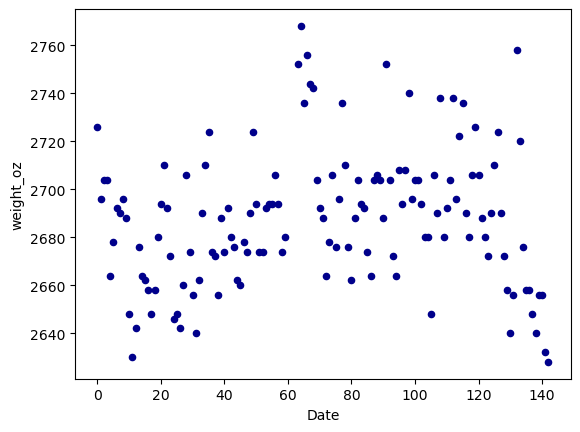

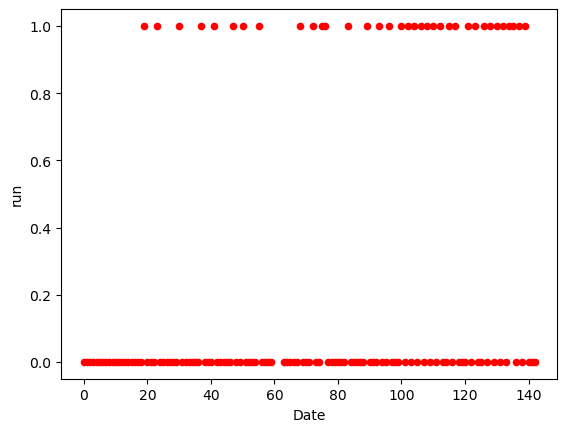

In [3]:
pdf = pd.DataFrame(data,columns=["Date", "weight_oz", "run"])

#clean the data of null data
pdf= pdf[pdf['weight_oz'] != 0]
pdf = pdf.dropna()

#change date coloum to days progressed
pdf['Date'] = pd.to_datetime(pd.to_datetime(pdf['Date'])) 
ref_date = pd.to_datetime('2018-07-30')
pdf['Date'] = (pdf['Date'] - ref_date) / pd.Timedelta(days=1)


#scatter plot of weight and date
pdf.plot.scatter(x='Date',y='weight_oz',c='DarkBlue')
pdf.plot.scatter(x='Date',y='run',c='red')

Here, we can observe a downward trend, especially near the tail end of the graph. Additionally, it seems that the density of the running feature grows higher near the tail end where we observe the most weight loss in this indivdual This suggests that the data is suitable for this problem as these weight fluctions are apparent, meaning the data will be variable to the feature we are trying to predict the value of.

Another point that can be seen here is the sort of "rocky" nature of the individuals weight. This is very accurate to real life, in which weight loss is not linear in the short run scope.

## The Machine Learning Model

The k-nearest neighbor algorithm (or KNN) is a supervised machine learning algorithm that measures the proximity of distance from it's "neighbor" data points, grouped around an individual data point; where k in the name "k-nearest neighbor" refers to the amount of neighbors within the closest distance. It uses distance metrics across it's given features to predict an outcome. Although KNN can also be used for regression problems, it particularly shines in classification problems. [2]

I will be utilizing the k-nearest neighbor algorithm with this particular data set for multiple reasons:
- Data set < 100,000 samples
- High tendency to be accurate
- Versatile

A downside that is often associated with the KNN algortithm is it's excessive use of memory due to being a lazy learner (focusing less on the "training" part of the data and more on the testing and prediction, meaning memory must be used to store most of the data). This however, is a minimal problem for this problem due to the concise nature of the data (data set < 100,000 samples).

<div>
<img src="https://static.javatpoint.com/tutorial/machine-learning/images/k-nearest-neighbor-algorithm-for-machine-learning3.png" width="400">
</div>

One tendecy of KNN is to be very sensitive to data scale, so it is imparitive to **standardize** the data before we fit the model.

### Feature selection
Since I will be utilizing the KNN classifier algorithm, we must chose the most meaningful features as KNN works best with a lower amount of features. I will be selecting:

- weight_oz: The weight of the individual taken that day
- calories: The calories consumed of the individual that day
- change: The change in weight (in oz) of the individual

We will be predicting the outcome of the *run* feature

In [4]:
from sklearn.preprocessing import StandardScaler
#create dataframe for ML model
data = pd.read_csv("diet_data.csv")
df = pd.DataFrame(data,columns=["Date", "weight_oz", "calories", "change", "run"])

#clean the data of null data
df = df.dropna()

#standardize data
scaler = StandardScaler()
to_scale = ['weight_oz', 'calories', 'change',]
df[to_scale] = scaler.fit_transform(df[to_scale])

print(df)


           Date  weight_oz  calories    change  run
0     7/30/2018   1.341006 -0.835253 -1.140161  0.0
1     7/31/2018   0.290610 -0.394115  0.379292  0.0
2      8/1/2018   0.570716 -0.461983  0.059407  0.0
3      8/2/2018   0.570716 -0.903120 -1.540017  0.0
4      8/3/2018  -0.829813 -0.190513  0.619206  0.0
..          ...        ...       ...       ...  ...
138  12/15/2018  -1.670131  1.743706  0.699177  0.0
139  12/16/2018  -1.109919 -0.156580  0.059407  1.0
140  12/17/2018  -1.109919 -0.835253 -0.900248  0.0
141  12/18/2018  -1.950237 -0.869187 -0.100535  0.0
142  12/19/2018  -2.090289 -1.140656 -1.140161  0.0

[140 rows x 5 columns]


Here we can observe the standardized data
# The Model
We will perform the train, test split for the features to prepare the data for the algorithm, in turn buidling the model. We will be using a test size of 30%.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['weight_oz', 'calories', 'change']], df['run'], test_size=0.3)

### Building the Classifier model
using the prepared data, I will fit the data with the KNN algorithm with K = 4 (4 neighbors, in the middle of too little or too many neighbors preventing overfitting/underfitting)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=4)
knn = classifier.fit(X_train, y_train)

### Assesing the model

In [7]:
prediction = classifier.predict(X_test)

#sum all correct predictions
correct = np.where(prediction == y_test, 1,0).sum()
print("Correct predictions:",correct)

#find accuracy in percentage
accuracy = 100 * (correct/len(y_test))
print("Accuracy of predictions:",accuracy,'%')

Correct predictions: 31
Accuracy of predictions: 73.80952380952381 %


In [8]:
from sklearn.metrics import classification_report
y_pred = knn.predict(X_test)
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.91      0.85        33
         1.0       0.25      0.11      0.15         9

    accuracy                           0.74        42
   macro avg       0.52      0.51      0.50        42
weighted avg       0.67      0.74      0.70        42



Here, we can see accuracy metrics of the Model that was created from the data deatures that were split for the algorithm. [3]

The **accuracy** of the Models predictions is ~73.8 % (rounded up to 74 % by our classification Report), which is a decent score for the data given and the nuance of the data expressed. 

The **precision** (True Positive/Predicted Positive) is 67%

The **recall** (True Positive/[True positive + False negative]) is 74%

The **f1-score** (2 * precision * recall/[precision + recall]) is 70%

Overall, from the classification report we can conclude a decent to good effectiveness rating for our generated ML model, as it's accuracy is >70%

#### Let's take a look at another metric
## Confusion Matrix

In [9]:
from sklearn.metrics import confusion_matrix

#generate confusion matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("confusion matrix:\n", cm)

confusion matrix:
 [[30  3]
 [ 8  1]]


<div style="float: left;">
<img src="https://miro.medium.com/v2/resize:fit:712/1*Z54JgbS4DUwWSknhDCvNTQ.png" width="250">
</div>

*confusion matrix diagram*

What are we looking at? A confusion matrix is a metric that represents the predicted and actual values of a ML model data group, where the predicted values are the *rows* and the actual values are the *coloumns*. Here, we can see that the model predicted 30 **true positive values** , and predicted 8 values **false negative** , meaning it predicted the value negative incorrectly. Additionally, the model accidentally predicted 3 positive values, the **false positives** - and correctly predicted one true value, the **true negatives**. The total value is the sample size, that being 42 samples predicted to the test sample given, and according to the **TP** and **FN** vales, our model had predicted 31 of those 42 values correctly (with 31/42 being our accuracy score, ~73.8%)

## Results and takeaway

With the results represented by the metrics, we can conclude that this model that was created by the KNN algorithm from our weight loss data is accurate enough to produce a metric to whether an individual is including running into their excercise regimen, according to their weight and other related features. This can be useful to help an individual decide whether they should include running in weight loss regimen, or not!

A takeaway from the data may be the timeline that is tied to the set. Because it only spans across around ~5 months, or ~150 samples, it may be beneficial for the algorithm to have an even more comprehensive dataset, such as a more long haul weight loss scenario, despite my belief that this provided data is extremely realistic to real life; with a new diet/excercise regimen lasting ~6 months for the average person. [4] 

Regardless, I believe the features given to the algorithm are the best features to be used within the variables present in excercise and weightloss, as these variables are the basis of weight on a human. I feel as this model can be seen in a perspective where the "run" feature we desire to predict is actually more like an indicator of *moderate activity* more than anything.

This model is a decently accurate depiction of the ability for running or moderate activity to impact the chronological journey substanced within weight loss.

<div style="float: left;">
<img src="https://media.istockphoto.com/id/626783824/photo/sport-accident-injury-stumble-and-fall-while-jogging.jpg?s=612x612&w=0&k=20&c=N5-kF4u2crY8Vo98osJTeKypSMKOdj-UUZfm7aVC4D4=" width="300">
</div>

*Citations:*

[1] [Data Set](https://www.kaggle.com/datasets/chrisbow/2018-calorie-exercise-and-weight-changes?resource=download)


[2] [K-nearest Neighbor](https://www.ibm.com/topics/knn#:~:text=The%20k%2Dnearest%20neighbors%20algorithm%2C%20also%20known%20as%20KNN%20or,of%20an%20individual%20data%20point.)

[3] [Lecture Resources](https://webcampus.fdu.edu/webapps/blackboard/execute/content/file?cmd=view&content_id=_3341287_1&course_id=_238003_1)

[4] [Obesity Statistics](https://www.webmd.com/obesity/features/how-to-stay-on-a-diet#:~:text=Typically%2C%20people%20last%20about%20six,University%27s%20Pennington%20Biomedical%20Research%20Center.)

Images:

[Runner](https://hips.hearstapps.com/hmg-prod/images/articles/2016/09/running-tips-1486650558.jpg?resize=1200:*)
[KNN graph](https://static.javatpoint.com/tutorial/machine-learning/images/k-nearest-neighbor-algorithm-for-machine-learning3.png)
[Confusion matrix](https://www.google.com/url?sa=i&url=https%3A%2F%2Ftowardsdatascience.com%2Funderstanding-confusion-matrix-a9ad42dcfd62&psig=AOvVaw2rUViyKK-dMhLh2K9TEz2X&ust=1684190074462000&source=images&cd=vfe&ved=0CA0QjRxqFwoTCMjR0ovv9f4CFQAAAAAdAAAAABAD![image.png](attachment:image.png))
[Runner falling on ground](https://media.istockphoto.com/id/626783824/photo/sport-accident-injury-stumble-and-fall-while-jogging.jpg?s=612x612&w=0&k=20&c=N5-kF4u2crY8Vo98osJTeKypSMKOdj-UUZfm7aVC4D4=)